In [166]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
import shutil
import keras 
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [151]:
#define Images Path of given dataset

IMAGES_PATH = 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset'
DATASET_PATH = 'Dataset'

In [121]:
df = pd.read_csv("Chest_xray_Corona_Metadata.csv")

In [122]:
df.shape

(5910, 6)

In [123]:
df_train = df[df["Dataset_type"]=="TRAIN"]
df_train.shape[0]

5286

In [124]:
df_test = df[df["Dataset_type"]=="TEST"]
df_test.shape[0]

624

<Figure size 432x288 with 0 Axes>

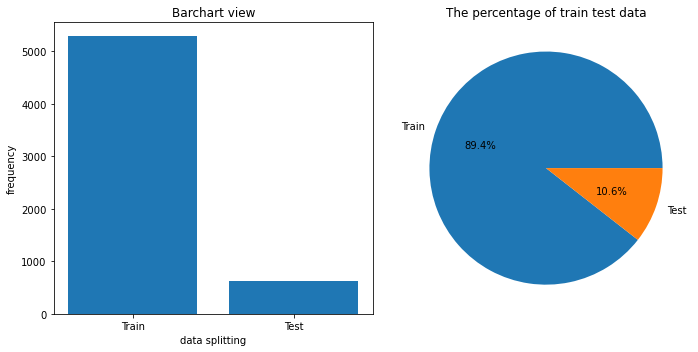

In [125]:
#Plotting data train and test data into bar chart

title = ["Train","Test"]
values = [df_train.shape[0],df_test.shape[0]]
fig = plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].bar(title, values)
axes[0].set(title='Barchart view',xlabel="data splitting",ylabel="frequency")
axes[1].pie(values,labels=title,autopct='%1.1f%%')
axes[1].set(title='The percentage of train test data')
fig.tight_layout()

In [119]:
count=0
for (i,row) in df_train.iterrows():
    file_name = row["X_ray_image_name"]
    

5286


In [128]:
df_train

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5281,5304,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,Pnemonia,TRAIN,COVID-19,Virus
5282,5305,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,Pnemonia,TRAIN,COVID-19,Virus
5283,5306,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5284,5307,1-s2.0-S0140673620303706-fx1_lrg.jpg,Pnemonia,TRAIN,COVID-19,Virus


In [163]:
Normal = df_train[df_train["Label"]=="Normal"]
Normal.count()

Unnamed: 0                1342
X_ray_image_name          1342
Label                     1342
Dataset_type              1342
Label_2_Virus_category       0
Label_1_Virus_category       0
dtype: int64

In [164]:
# Copying Images from (Github) Train and make into a new Dataset
count=0
for i,row in df_train.iterrows():
    if row["Label"]=="Normal":
        file_name = row["X_ray_image_name"]
        source = os.path.join(IMAGES_PATH + '/train/',file_name)
        destination = os.path.join(DATASET_PATH + '/Train/Normal/',file_name)
        shutil.copy2(source,destination)
    elif row["Label"]=="Pnemonia":
        file_name = row["X_ray_image_name"]
        source = os.path.join(IMAGES_PATH + '/train/',file_name)
        destination = os.path.join(DATASET_PATH + '/Train/Covid/',file_name)
        shutil.copy2(source,destination)
print("Image copy completed")

Image copy completed


In [165]:
# Copying Images from (Github) Test and make into a new Dataset
count=0
for i,row in df_test.iterrows():
    if row["Label"]=="Normal":
        file_name = row["X_ray_image_name"]
        source = os.path.join(IMAGES_PATH + '/test/',file_name)
        destination = os.path.join(DATASET_PATH + '/Test/Normal/',file_name)
        shutil.copy2(source,destination)
    elif row["Label"]=="Pnemonia":
        file_name = row["X_ray_image_name"]
        source = os.path.join(IMAGES_PATH + '/test/',file_name)
        destination = os.path.join(DATASET_PATH + '/Test/Covid/',file_name)
        shutil.copy2(source,destination)
print("Test Image copy completed")

Test Image copy completed


In [167]:
# Creating the path for fitting the model

TRAIN_PATH = DATASET_PATH + '/Train/'
VAL_PATH = DATASET_PATH + '/Test/'

In [170]:
#Creating the CNN model 
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=["accuracy"])

In [171]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [179]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [180]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224,224),
    batch_size=32,
    class_mode  = 'binary'
)

Found 5286 images belonging to 2 classes.


In [181]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [182]:
validation_generator = test_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(224,224),
    batch_size=32,
    class_mode  = 'binary'
)

Found 624 images belonging to 2 classes.


In [183]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

C:\Users\User\AppData\Local\Temp/ipykernel_2452/3585063659.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 16s 2s/step - loss: 1.6560 - accuracy: 0.5938 - val_loss: 0.7051 - val_accuracy: 0.5625
Epoch 2/10
8/8 [==============================] - 15s 2s/step - loss: 0.5883 - accuracy: 0.7500 - val_loss: 0.7095 - val_accuracy: 0.5156
Epoch 3/10
8/8 [==============================] - 14s 2s/step - loss: 0.5212 - accuracy: 0.7930 - val_loss: 0.5784 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 14s 2s/step - loss: 0.5796 - accuracy: 0.7578 - val_loss: 0.6575 - val_accuracy: 0.6562
Epoch 5/10
8/8 [==============================] - 15s 2s/step - loss: 0.5954 - accuracy: 0.7344 - val_loss: 0.6936 - val_accuracy: 0.5938
Epoch 6/10
8/8 [==============================] - 15s 2s/step - loss: 0.5593 - accuracy: 0.7422 - val_loss: 0.5943 - val_accuracy: 0.7344
Epoch 7/10
8/8 [==============================] - 14s 2s/step - loss: 0.5766 - accuracy: 0.7578 - val_loss: 0.6356 - val_accuracy: 0.6719
Epoch 8/10
8/8 [==================

In [186]:
#evaluate 

model.evaluate_generator(train_generator)

C:\Users\User\AppData\Local\Temp/ipykernel_2452/2958261026.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.5555747747421265, 0.7461218237876892]

In [188]:
model.evaluate_generator(validation_generator)

C:\Users\User\AppData\Local\Temp/ipykernel_2452/3378472596.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.6327773332595825, 0.625]